## Pair programming Visualización
__________

Requisitos que deben cumplir las gráficas:
- Todas deben llevar título.
- Los nombres de los ejes deben estar en castellano.
- En los scatterplot los puntos deben tener un tamaño de 2.
- En los scatterplot los puntos deben tener un color diferente al azul.
- En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.
- En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.
- En los pieplot los quesitos deben tener unos colores diferentes a los que vienen por defecto.
- En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.
- En los pieplot el tamaño de los % tiene que ser de 6.
_______________

In [1]:
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [2]:
df = pd.read_csv('pair_nulos.csv', index_col=0)
df

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,África
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europa
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,África
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730,América del Sur
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332,África


In [3]:
df.columns.to_list()

['country',
 'density',
 'abbreviation',
 'agriculturalland',
 'landarea',
 'armedforcessize',
 'birthrate',
 'callingcode',
 'capital/majorcity',
 'co2-emissions',
 'cpi',
 'cpichange',
 'currency-code',
 'fertilityrate',
 'forestedarea',
 'gasolineprice',
 'gdp',
 'grossprimaryeducationenrollment',
 'grosstertiaryeducationenrollment',
 'infantmortality',
 'largestcity',
 'lifeexpectancy',
 'maternalmortalityratio',
 'minimumwage',
 'officiallanguage',
 'outofpockethealthexpenditure',
 'physiciansperthousand',
 'population',
 'populationlaborforceparticipation',
 'taxrevenue',
 'totaltaxrate',
 'unemploymentrate',
 'urban_population',
 'lattitude',
 'longitude',
 'continente']

In [4]:
df.dtypes

country                               object
density                              float64
abbreviation                          object
agriculturalland                     float64
landarea                             float64
armedforcessize                      float64
birthrate                            float64
callingcode                          float64
capital/majorcity                     object
co2-emissions                        float64
cpi                                  float64
cpichange                            float64
currency-code                         object
fertilityrate                        float64
forestedarea                         float64
gasolineprice                        float64
gdp                                  float64
grossprimaryeducationenrollment      float64
grosstertiaryeducationenrollment     float64
infantmortality                      float64
largestcity                           object
lifeexpectancy                       float64
maternalmo

In [5]:
df['birthrate']

0      32.49
1      11.78
2      24.28
3       7.20
4      40.73
       ...  
190    17.88
191    16.75
192    30.45
193    36.19
194    30.68
Name: birthrate, Length: 195, dtype: float64

1- ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

<AxesSubplot:xlabel='birthrate', ylabel='Count'>

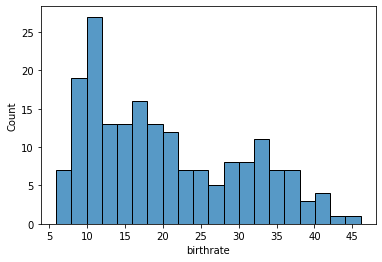

In [6]:
sns.histplot(df, x = 'birthrate', bins = 20)

2- ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

<AxesSubplot:xlabel='infantmortality', ylabel='lifeexpectancy'>

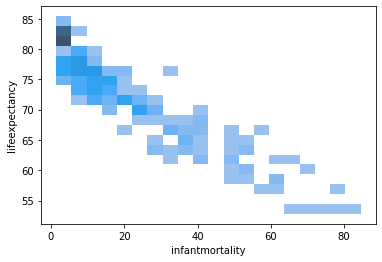

In [7]:
sns.histplot(df, x = 'infantmortality', y = 'lifeexpectancy', bins = 20)

A menor mortalidad infantil, la esperanza de vida es mayor.

3- ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [8]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'lattitude', 'longitude',
       'continente'],
      dtype='object')

In [11]:
continente_paises = df.groupby("continente")["abbreviation"].count().reset_index()
continente_paises

,continente,abbreviation
0,América del Norte,21
1,América del Sur,12
2,Asia,43
3,Desconocido,10
4,Europa,41
5,Oceanía,13
6,África,48


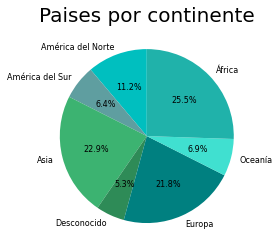

In [16]:


plt.pie(continente_paises["abbreviation"],  
        labels=continente_paises["continente"],
        autopct='%1.1f%%',
        colors=["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"],
        textprops={'fontsize': 8},
        startangle=90)

plt.title("Paises por continente", fontsize=20)
plt.show()


4- ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [17]:
esperanza_vida_europa = df[df["continente"]== "Europa"]
esperanza_vida_europa

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europa
9,Austria,109.0,AT,32.4,83871.0,21000.0,9.70,43.0,Vienna,61448.0,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,8877067.0,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072,Europa
15,Belarus,47.0,BY,42.0,207600.0,155000.0,9.90,375.0,Minsk,58280.0,NaN,5.6,BYN,1.45,42.6,0.60,6.308046e+10,100.5,87.4,2.6,Minsk,74.2,2.0,1.49,Russian,34.5,5.19,9466856.0,64.1,14.7,53.3,4.59,7482982.0,53.709807,27.953389,Europa
16,Belgium,383.0,BE,44.6,30528.0,32000.0,10.30,32.0,City of Brussels,96889.0,117.11,1.4,EUR,1.62,22.6,1.43,5.296067e+11,103.9,79.7,2.9,Brussels,81.6,5.0,10.31,French,17.6,3.07,11484055.0,53.6,24.0,55.4,5.59,11259082.0,50.503887,4.469936,Europa
21,Bosnia and Herzegovina,64.0,BA,43.1,51197.0,11000.0,8.11,387.0,Sarajevo,21848.0,104.90,0.6,BAM,1.27,42.7,1.05,2.004785e+10,NaN,23.3,5.0,Tuzla Canton,77.3,10.0,1.04,Bosnian,28.6,2.16,3301000.0,46.4,20.4,23.7,18.42,1605144.0,43.915886,17.679076,Europa
25,Bulgaria,64.0,BG,46.3,110879.0,31000.0,8.90,359.0,Sofia,41708.0,114.42,3.1,BGN,1.56,35.4,1.11,8.600000e+10,89.3,71.0,5.9,Sofia,74.9,10.0,1.57,Bulgarian,47.7,4.03,6975761.0,55.4,20.2,28.3,4.34,5256027.0,42.733883,25.485830,Europa
41,Croatia,73.0,HR,27.6,56594.0,18000.0,9.00,385.0,Zagreb,17488.0,109.82,0.8,HRK,1.47,34.4,1.26,6.041555e+10,96.5,67.9,4.0,Zagreb,78.1,8.0,2.92,Croatian,15.2,3.00,4067500.0,51.2,22.0,20.5,6.93,2328318.0,45.100000,15.200000,Europa
43,Cyprus,131.0,CY,12.2,9251.0,16000.0,10.46,357.0,Nicosia,6626.0,102.51,0.3,EUR,1.33,18.7,1.23,2.456465e+10,99.3,75.9,1.9,Statos�������,80.8,6.0,NaN,Greek,43.9,1.95,1198575.0,63.1,24.5,22.4,7.27,800708.0,35.126413,33.429859,Europa
46,Denmark,137.0,DK,62.0,43094.0,15000.0,10.60,45.0,Copenhagen,31786.0,110.35,0.8,DKK,1.73,14.7,1.55,3.480780e+11,101.3,80.6,3.6,Copenhagen,81.0,4.0,NaN,Danish,13.7,4.01,5818553.0,62.2,32.4,23.8,4.91,5119978.0,56.263920,9.501785,Europa


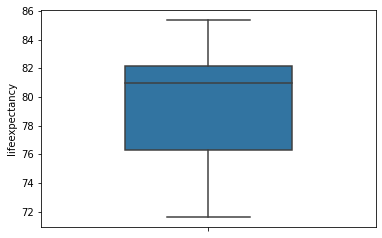

In [18]:
sns.boxplot( y="lifeexpectancy", data=esperanza_vida_europa, width=0.5);

La mediana está por encima de los 81 años de edad. Según esta gráfica no hay valores atípicos.

5- ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

In [20]:
df["infantmortality"]

0      47.9
1       7.8
2      20.1
3       2.7
4      51.6
       ... 
190    21.4
191    16.5
192    42.9
193    40.4
194    33.9
Name: infantmortality, Length: 195, dtype: float64

6- ¿Cuáles son los 10 países con la mayor área forestal?

7- ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

8- ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

9- ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

10- Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
- Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
- Un histograma de la tasa de impuestos total.
- Un gráfico de barras que resuma la tasa de impuestos total por continente.